In [9]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as xet
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as imd

In [47]:
path = glob('images/*.xml')
path

['images\\N1.xml',
 'images\\N100.xml',
 'images\\N101.xml',
 'images\\N102.xml',
 'images\\N103.xml',
 'images\\N104.xml',
 'images\\N105.xml',
 'images\\N106.xml',
 'images\\N107.xml',
 'images\\N108.xml',
 'images\\N109.xml',
 'images\\N11.xml',
 'images\\N110.xml',
 'images\\N111.xml',
 'images\\N112.xml',
 'images\\N113.xml',
 'images\\N114.xml',
 'images\\N116.xml',
 'images\\N117.xml',
 'images\\N118.xml',
 'images\\N119.xml',
 'images\\N12.xml',
 'images\\N120.xml',
 'images\\N121.xml',
 'images\\N122.xml',
 'images\\N123.xml',
 'images\\N124.xml',
 'images\\N126.xml',
 'images\\N127.xml',
 'images\\N128.xml',
 'images\\N129.xml',
 'images\\N130.xml',
 'images\\N131.xml',
 'images\\N132.xml',
 'images\\N133.xml',
 'images\\N134.xml',
 'images\\N135.xml',
 'images\\N136.xml',
 'images\\N137.xml',
 'images\\N138.xml',
 'images\\N139.xml',
 'images\\N14.xml',
 'images\\N140.xml',
 'images\\N141.xml',
 'images\\N142.xml',
 'images\\N143.xml',
 'images\\N144.xml',
 'images\\N145.xml

In [49]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:
    # file_name = path[0]
    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    label_info = member_object.find('bndbox')
    xmin = int(label_info.find('xmin').text)
    xmax = int(label_info.find('xmax').text)
    ymin = int(label_info.find('ymin').text)
    ymax = int(label_info.find('ymax').text)
    # print(xmin, xmax, ymin, ymax
    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [50]:
df = pd.DataFrame(labels_dict)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,images\N1.xml,1093,1396,645,727
1,images\N100.xml,134,301,312,350
2,images\N101.xml,31,139,128,161
3,images\N102.xml,164,316,216,243
4,images\N103.xml,813,1067,665,724


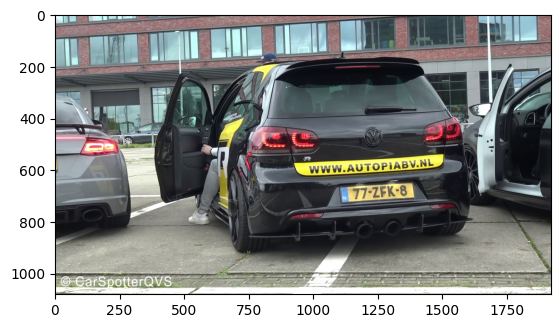

In [52]:
plt.imshow(imd.imread( 'images/N1.jpeg'))

In [ ]:
# LABEL YOLO
# CENTER_X,CENER_Y,WIDTH,HEIGHT

In [53]:
def parsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    filename = f'./images/{name}'

    # width and height
    parser_size = parser.find('size')
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)
    
    return filename, width, height
df[['filename','width','height']] = df['filepath'].apply(parsing).apply(pd.Series)

In [55]:
df.head()

,filepath,xmin,xmax,ymin,ymax,filename,width,height
0,images\N1.xml,1093,1396,645,727,./images/N1.jpeg,1920,1080
1,images\N100.xml,134,301,312,350,./images/N100.jpeg,450,417
2,images\N101.xml,31,139,128,161,./images/N101.jpeg,249,239
3,images\N102.xml,164,316,216,243,./images/N102.jpeg,478,395
4,images\N103.xml,813,1067,665,724,./images/N103.jpeg,1800,1200


In [56]:
df['center_x'] = (df['xmax'] + df['xmin'])/(2*df['width'])
df['center_y'] = (df['ymax'] + df['ymin'])/(2*df['height'])

df['bb_width'] = (df['xmax'] - df['xmin'])/df['width']
df['bb_height'] = (df['ymax'] - df['ymin'])/df['height']



In [57]:
df.head()

,filepath,xmin,xmax,ymin,ymax,filename,width,height,center_x,center_y,bb_width,bb_height
0,images\N1.xml,1093,1396,645,727,./images/N1.jpeg,1920,1080,0.648177,0.635185,0.157812,0.075926
1,images\N100.xml,134,301,312,350,./images/N100.jpeg,450,417,0.483333,0.793765,0.371111,0.091127
2,images\N101.xml,31,139,128,161,./images/N101.jpeg,249,239,0.341365,0.604603,0.433735,0.138075
3,images\N102.xml,164,316,216,243,./images/N102.jpeg,478,395,0.502092,0.581013,0.317992,0.068354
4,images\N103.xml,813,1067,665,724,./images/N103.jpeg,1800,1200,0.522222,0.578750,0.141111,0.049167


In [58]:
# split data into train and test
import os
from shutil import copy

In [59]:
df_train = df.iloc[:200]
df_test = df.iloc[200:]

In [60]:
train_folder = 'data_images/train'
values = df_train[['filename','center_x','center_y','bb_width','bb_height']].values

for fname, x, y, w, h in values:
    # Extract the image name from the filepath
    image_name = os.path.split(fname)[-1]
    
    # Create a text file name by removing the extension from the image name
    txt_name = os.path.splitext(image_name)[0]
    
    # Create destination paths for the image and label
    dest_image_name = os.path.join(train_folder, image_name)
    dest_file_name = os.path.join(train_folder, txt_name + '.txt')
    
    # Copy the image file to the new destination
    copy(fname, dest_image_name)
    
    # Create the label string and write it to the txt file
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dest_file_name, mode='w') as f:
        f.write(label_txt)


In [61]:
test_folder= 'data_images/test/'
values = df_test[['filename','center_x','center_y','bb_width','bb_height']].values

for fname, x, y, w, h in values:
    # Extract the image name from the filepath
    image_name = os.path.split(fname)[-1]
    
    # Create a text file name by removing the extension from the image name
    txt_name = os.path.splitext(image_name)[0]
    
    # Create destination paths for the image and label
    dest_image_name = os.path.join(test_folder, image_name)
    dest_file_name = os.path.join(test_folder, txt_name + '.txt')
    
    # Copy the image file to the new destination
    copy(fname, dest_image_name)
    
    # Create the label string and write it to the txt file
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dest_file_name, mode='w') as f:
        f.write(label_txt)
